<a href="https://colab.research.google.com/github/dishang8/Logistic_Regression_Churn_Analysis/blob/main/Task_2_LogisticRegressionforBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [15]:
from google.colab import files
uploaded = files.upload()

Saving churn-bigml-20.csv to churn-bigml-20 (1).csv
Saving churn-bigml-80.csv to churn-bigml-80 (1).csv


In [16]:
df1 = pd.read_csv("churn-bigml-80.csv")
df2 = pd.read_csv("churn-bigml-20.csv")

df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)
print(df.columns)

(3333, 20)
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [17]:
# Drop irrelevant columns
for col in ['State', 'Area Code']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

# Convert Churn column to binary
df['Churn'] = df['Churn'].map({True: 1, False: 0})

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
LogisticRegression(class_weight='balanced', max_iter=1000)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
odds_ratios = np.exp(coefficients)

print("\nTop Positive Predictors:")
print(odds_ratios.sort_values(ascending=False).head(10))

print("\nTop Negative Predictors:")
print(odds_ratios.sort_values().head(10))


Top Positive Predictors:
Customer service calls    2.231697
International plan_Yes    2.054359
Number vmail messages     1.523833
Total day charge          1.400193
Total day minutes         1.400181
Total eve minutes         1.218353
Total eve charge          1.218196
Total intl charge         1.110416
Total intl minutes        1.106493
Total day calls           1.078273
dtype: float64

Top Negative Predictors:
Voice mail plan_Yes    0.454999
Total intl calls       0.866902
Total night calls      1.002566
Area code              1.011337
Total eve calls        1.019163
Account length         1.050166
Total night minutes    1.064833
Total night charge     1.065104
Total day calls        1.078273
Total intl minutes     1.106493
dtype: float64


Accuracy: 0.7811094452773614
Precision: 0.3567567567567568
Recall: 0.7096774193548387
ROC AUC: 0.8023491064403732

Confusion Matrix:
[[455 119]
 [ 27  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       574
           1       0.36      0.71      0.47        93

    accuracy                           0.78       667
   macro avg       0.65      0.75      0.67       667
weighted avg       0.86      0.78      0.81       667



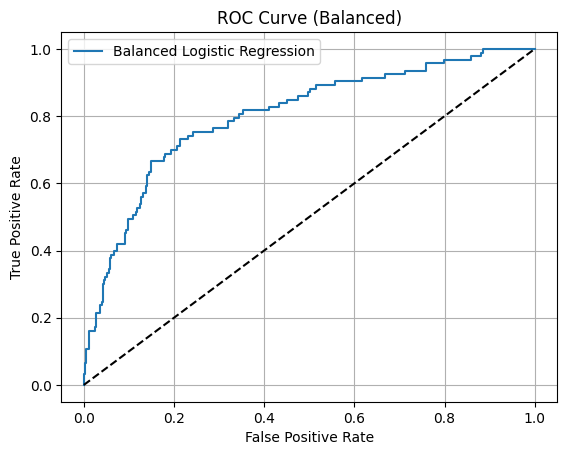

In [21]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Balanced Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Balanced)")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

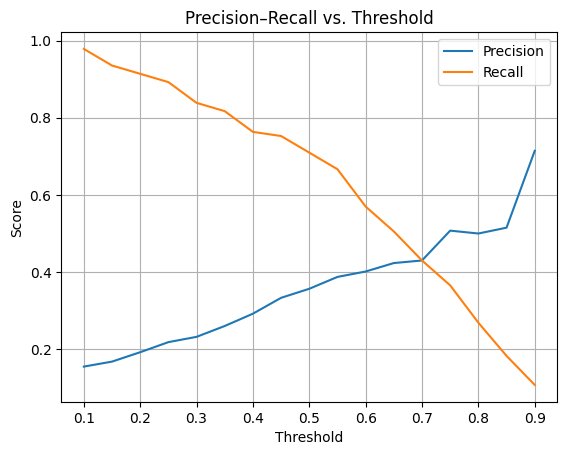

In [23]:
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision–Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

print(f"\nResults at threshold = {threshold}")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))


Results at threshold = 0.3
Accuracy: 0.5907046476761619
Confusion Matrix:
 [[316 258]
 [ 15  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70       574
           1       0.23      0.84      0.36        93

    accuracy                           0.59       667
   macro avg       0.59      0.69      0.53       667
weighted avg       0.85      0.59      0.65       667

